## What is the most optimal skill to learn for the Data Analysts ?

#### Methodology

1. Group skills to get Median salary and likelihood of being in posting
2. Visualize median salary and percent of skill demand
3. Determine if certain technologies are more prevelant

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [3]:
df_DA_ind = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_DA_ind = df_DA_ind.dropna(subset = ['salary_year_avg'])
df_DA_ind_exploded = df_DA_ind.explode('job_skills')

In [52]:
df_DA_skills = (df_DA_ind_exploded.groupby('job_skills')['salary_year_avg'].
                agg(['count', 'median']).sort_values(by='count', ascending=False)
                )
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_Count', 'median': 'median_salary'})

DA_total_jobs = len(df_DA_ind)

df_DA_skills['skill_percent'] = (df_DA_skills['skill_Count'] / DA_total_jobs) * 100
percent_req = 11

df_DA_high_dem = df_DA_skills[df_DA_skills['skill_percent'] > percent_req]
df_DA_high_dem


,skill_Count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
power bi,17,111175.0,18.085106
azure,15,93600.0,15.957447
aws,12,79200.0,12.765957
oracle,11,79200.0,11.702128


**Making a Seperate dictionary of Type of job skill**

In [53]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))



In [54]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')

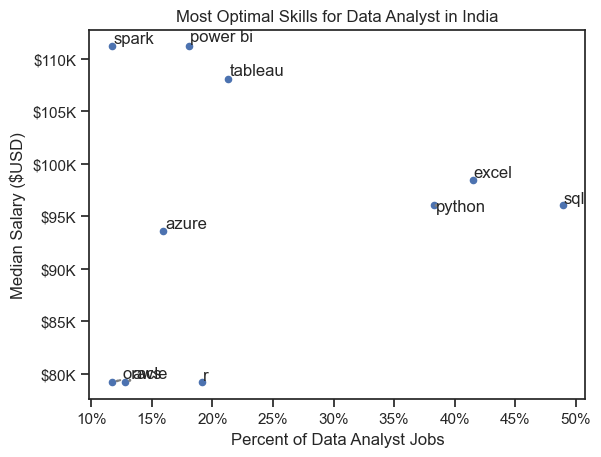

In [55]:
from adjustText import adjust_text
df_DA_high_dem.plot(kind='scatter',x='skill_percent', y='median_salary')
texts = []
for i, txt in enumerate(df_DA_high_dem.index):
    texts.append(
        plt.annotate(txt, (df_DA_high_dem['skill_percent'].iloc[i], df_DA_high_dem['median_salary'].iloc[i]))
        )

from matplotlib.ticker import PercentFormatter

adjust_text(texts, arrowprops = dict(arrowstyle='->', color='gray', lw=1.5))
ax=plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
plt.title('Most Optimal Skills for Data Analyst in India')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')

plt.show()

In [56]:
df_plot = df_DA_high_dem.merge(df_technology, left_on='job_skills', right_on='skills')

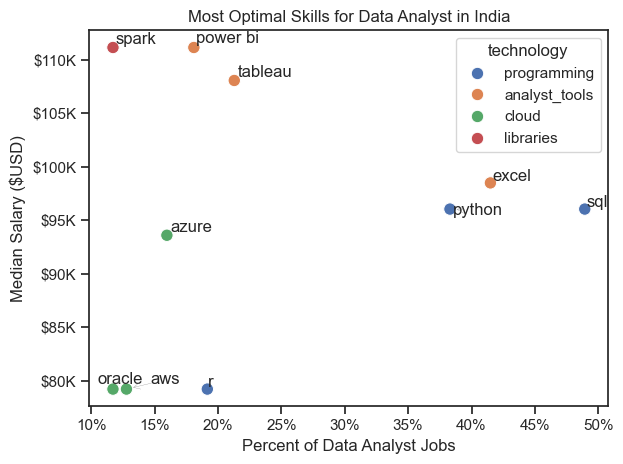

In [ ]:
from adjustText import adjust_text
#df_DA_high_dem.plot(kind='scatter',x='skill_percent', y='median_salary')


sns.scatterplot(
    data = df_plot,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology',
    s = 80
)


texts = []
for i, row in df_plot.iterrows():
    texts.append(
        plt.text(row['skill_percent'], row['median_salary'], row['skills'], fontsize=12)  )

from matplotlib.ticker import PercentFormatter

adjust_text(texts, arrowprops = dict(arrowstyle='->', color='gray', lw=0.2, shrinkA=10, shrinkB=5),
            force_text=0.5, force_points=0.5)
ax=plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
plt.title('Most Optimal Skills for Data Analyst in India')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.tight_layout()
plt.show()